# Section 1: Introduction to the Problem

hello world

# Section 2: Dataset Description

[Provide a brief description of the dataset]





## Section 2.1 : Source of the dataset
[State the source of the dataset and how it was collected.]

In [24]:
import os
import zipfile

# Clone the GitHub repository where the dataset is stored
!git clone https://github.com/NeoRedcraft/dl-project-1

# Define the path to the cloned repository
repo_path = 'dl-project-1' # This should match the directory name from cloning

# Define the path to the raw data directory within the repository
raw_data_path = os.path.join(repo_path, 'data/raw')

# List of zip files to extract
zip_files_to_extract = [
    'Age_Related_Macular_Degeneration.zip',
    'Hypertensive_Retinopathy.zip',
    'Normal_Fundus.zip',
    'Pathological_Myopia.zip'
]

# Define the directory where you want to extract the contents
extract_dir_base = os.path.join(repo_path, 'extracted_data') # Base directory for extraction

# Iterate through each zip file and extract it
for zip_file_name in zip_files_to_extract:
    zip_file_path = os.path.join(raw_data_path, zip_file_name)
    # Create a dedicated extraction directory for each zip file
    extract_dir = os.path.join(extract_dir_base, os.path.splitext(zip_file_name)[0])

    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted {zip_file_name} to: {extract_dir}")
    except FileNotFoundError:
        print(f"Error: Zip file not found at {zip_file_path}")
    except zipfile.BadZipFile:
        print(f"Error: Could not open or read the zip file at {zip_file_path}. It might be corrupted.")
    except Exception as e:
        print(f"An error occurred during extraction {zip_file_name}: {e}")



fatal: destination path 'dl-project-1' already exists and is not an empty directory.
Error: Zip file not found at dl-project-1/data/raw/Age_Related_Macular_Degeneration.zip
Error: Zip file not found at dl-project-1/data/raw/Hypertensive_Retinopathy.zip
Error: Zip file not found at dl-project-1/data/raw/Normal_Fundus.zip
Error: Zip file not found at dl-project-1/data/raw/Pathological_Myopia.zip


## Section 2.2: Dataset Structure
[Explain the dataset structure (number of images, labels, categories)]

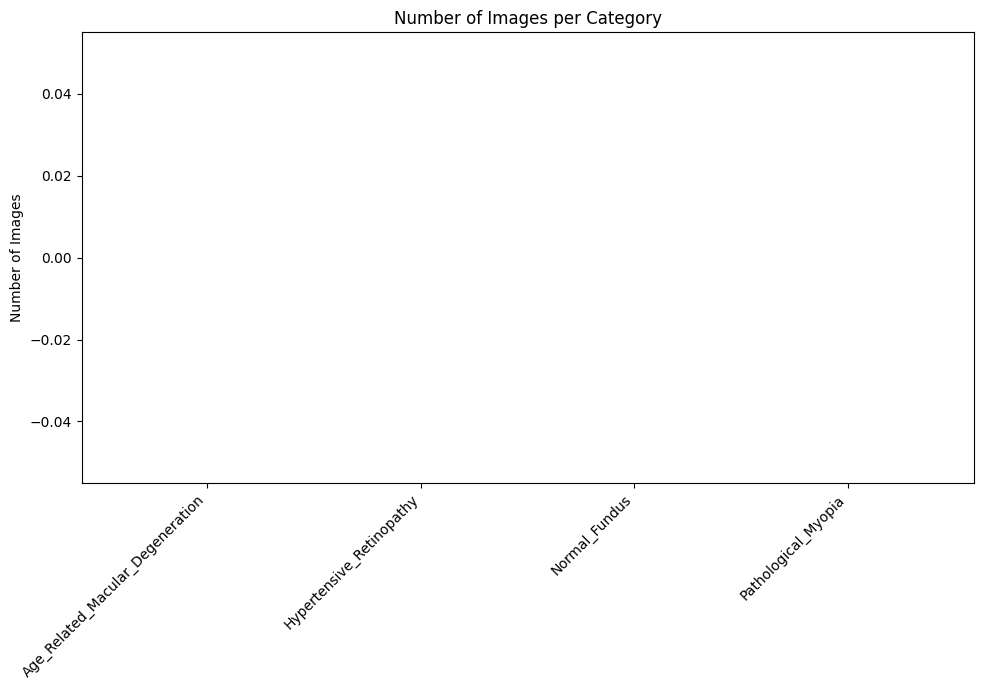

In [22]:
import os
import matplotlib.pyplot as plt

# Define the base directory where the zip files were extracted
extract_dir_base = 'dl-project-1/extracted_data' # This should match the extraction directory from the previous step

# List of the extracted directories (corresponding to the original zip files)
extracted_folders = [
    'Age_Related_Macular_Degeneration',
    'Hypertensive_Retinopathy',
    'Normal_Fundus',
    'Pathological_Myopia'
]

# Dictionary to store the count of files in each folder
folder_counts = {}

# Iterate through each extracted folder and count the files
for folder_name in extracted_folders:
    # Construct the path to the nested folder
    nested_folder_path = os.path.join(extract_dir_base, folder_name, folder_name) # Assuming the nested folder has the same name

    if os.path.exists(nested_folder_path):
        # Count files (excluding directories) in the nested folder
        file_count = len([f for f in os.listdir(nested_folder_path) if os.path.isfile(os.path.join(nested_folder_path, f))])
        folder_counts[folder_name] = file_count
        print(f"Count for '{folder_name}': {file_count}")
    else:
        print(f"Warning: Nested folder not found at {nested_folder_path}")
        folder_counts[folder_name] = 0 # Add with 0 count if folder not found


# Prepare data for the bar graph
labels = list(folder_counts.keys())
counts = list(folder_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'orange', 'red', 'green'])
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Prepare data for the pie chart
pie_labels = list(folder_counts.keys())
pie_sizes = list(folder_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Disease Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# You can also print the counts for clarity
print("Number of images per disease category:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:3343: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 800x800 with 1 Axes>

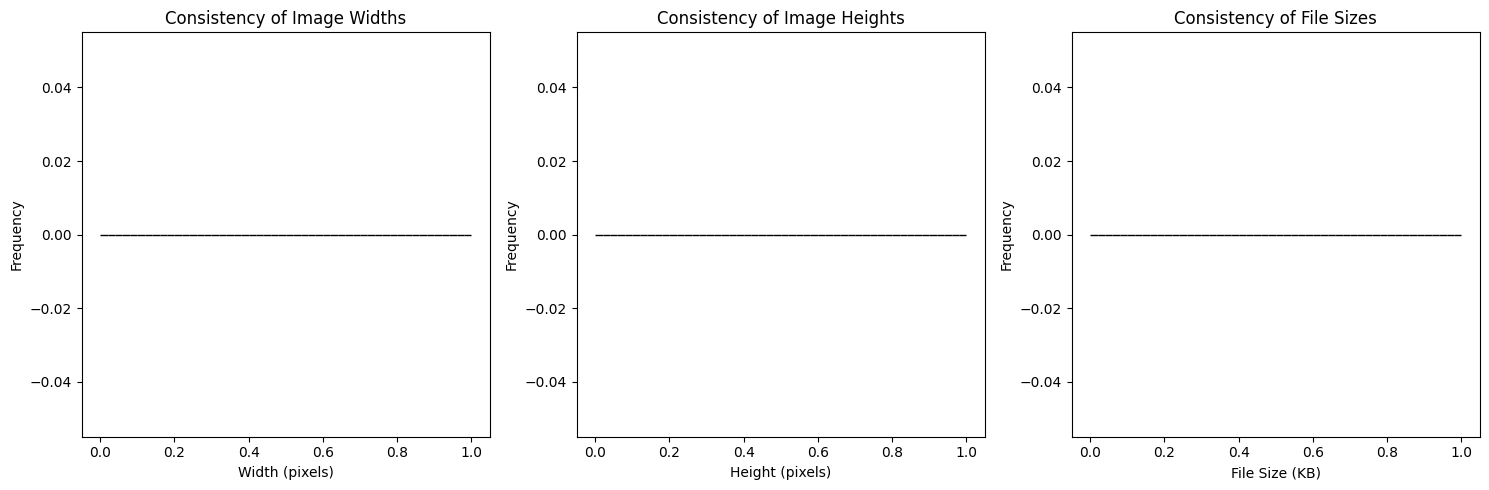

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store image attributes
resolutions = []
file_sizes = []

# Iterate through each extracted folder and collect attributes from images within the nested folder
for folder_name in extracted_folders:
    nested_folder_path = os.path.join(extract_dir_base, folder_name, folder_name) # Assuming the nested folder structure

    if os.path.exists(nested_folder_path):
        for filename in os.listdir(nested_folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                filepath = os.path.join(nested_folder_path, filename)

                # Get file size
                file_size_kb = os.path.getsize(filepath) / 1024  # in KB
                file_sizes.append(file_size_kb)

                try:
                    # Open image to get resolution
                    with Image.open(filepath) as img:
                        width, height = img.size
                        resolutions.append((width, height))
                except Exception as e:
                    print(f"Could not process image {filepath}: {e}")
    else:
        print(f"Warning: Nested folder not found for {folder_name} at {nested_folder_path}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes')

plt.tight_layout()
plt.show()

Now that you have the repository cloned, you can locate the zip file within the cloned directory.

Assuming the zip file is located at a specific path within the cloned repository, you can use the following steps to unzip it and access the data:

## Section 2.3: Preprocessing Steps
[Discuss any preprocessing steps applied (resizing, augmentation, annotation formats,
etc.)]

/content/dl-project-1/data/dl-project-1.v2i.yolov12


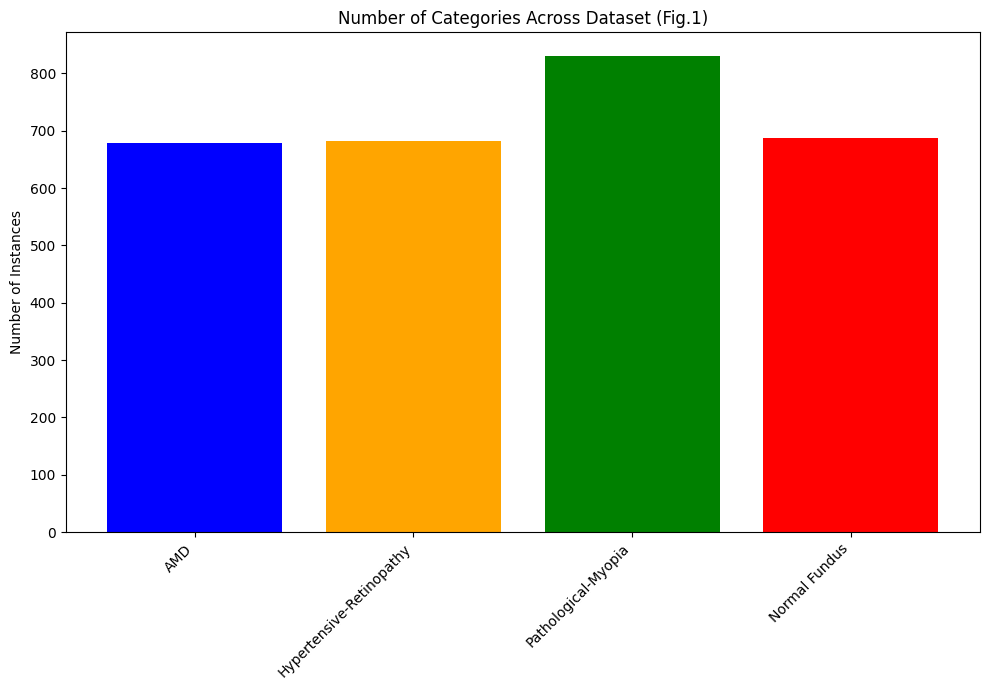

In [14]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Change to the directory containing the dataset folders
%cd /content/dl-project-1/data/dl-project-1.v2i.yolov12

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# Define the keywords to look for in image filenames for the other classes
amd_keyword = 'AMD'
hypertensive_keyword = 'Hypertensive-Retinopathy'
myopia_keyword = 'Pathological-Myopia'
normal_fundus_name = 'Normal Fundus'
other_class_keywords = [amd_keyword.lower(), hypertensive_keyword.lower(), myopia_keyword.lower()]

# Function to count images for the specific disease classes based on filename keywords
def count_disease_classes_by_filename(image_folder):
    class_counts = defaultdict(int)
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        if amd_keyword.lower() in filename_lower:
            class_counts[amd_keyword] += 1
        elif hypertensive_keyword.lower() in filename_lower:
            class_counts[hypertensive_keyword] += 1
        elif myopia_keyword.lower() in filename_lower:
            class_counts[myopia_keyword] += 1

    return class_counts

# Function to count Normal Fundus images based on the absence of other class keywords in filename
def count_normal_fundus_by_filename(image_folder):
    normal_fundus_count = 0
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_filename in image_files:
        filename_lower = image_filename.lower()
        is_other_class = False
        for keyword in other_class_keywords:
            if keyword in filename_lower:
                is_other_class = True
                break
        if not is_other_class:
            normal_fundus_count += 1

    return normal_fundus_count


# Count classes in each split based on filenames
train_disease_counts = count_disease_classes_by_filename(train_images_path)
train_normal_fundus_count = count_normal_fundus_by_filename(train_images_path)

valid_disease_counts = count_disease_classes_by_filename(valid_images_path)
valid_normal_fundus_count = count_normal_fundus_by_filename(valid_images_path)

test_disease_counts = count_disease_classes_by_filename(test_images_path)
test_normal_fundus_count = count_normal_fundus_by_filename(test_images_path)


# Combine counts from all splits
total_class_counts = defaultdict(int)
all_class_names = [amd_keyword, hypertensive_keyword, myopia_keyword, normal_fundus_name]

# Sum disease counts
for class_name in [amd_keyword, hypertensive_keyword, myopia_keyword]:
    total_class_counts[class_name] = (
        train_disease_counts[class_name] +
        valid_disease_counts[class_name] +
        test_disease_counts[class_name]
    )

# Sum Normal Fundus counts
total_class_counts[normal_fundus_name] = (
    train_normal_fundus_count +
    valid_normal_fundus_count +
    test_normal_fundus_count
)


# Prepare data for the bar graph
labels = list(total_class_counts.keys())
counts = list(total_class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Number of Instances')
plt.title('Number of Categories Across Dataset (Fig.1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

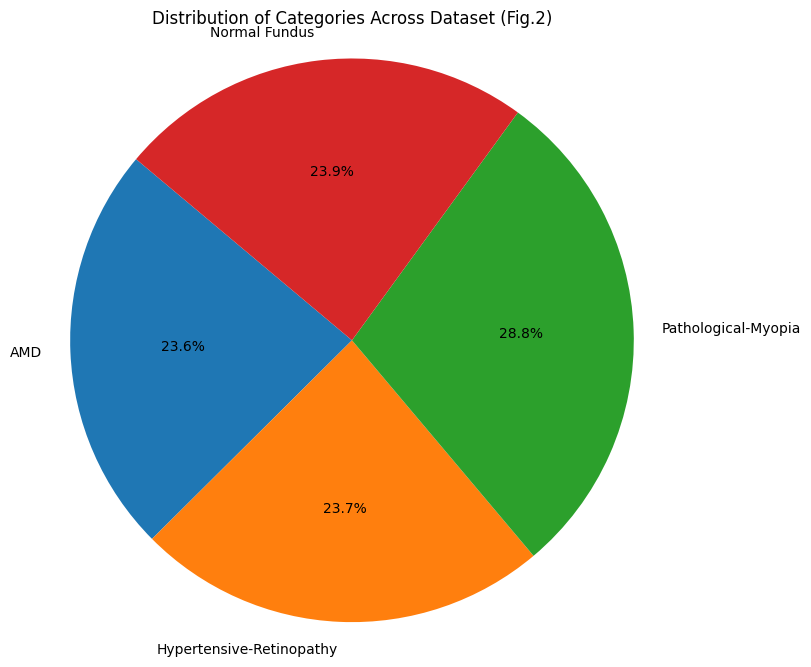

Total number of instances for each class:
AMD: 678
Hypertensive-Retinopathy: 682
Pathological-Myopia: 830
Normal Fundus: 688


In [ ]:
# Prepare data for the pie chart
pie_labels = list(total_class_counts.keys())
pie_sizes = list(total_class_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories Across Dataset (Fig.2)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print total number for each class
print("Total number of instances for each class:")
for label, count in zip(pie_labels, pie_sizes):
    print(f"{label}: {count}")

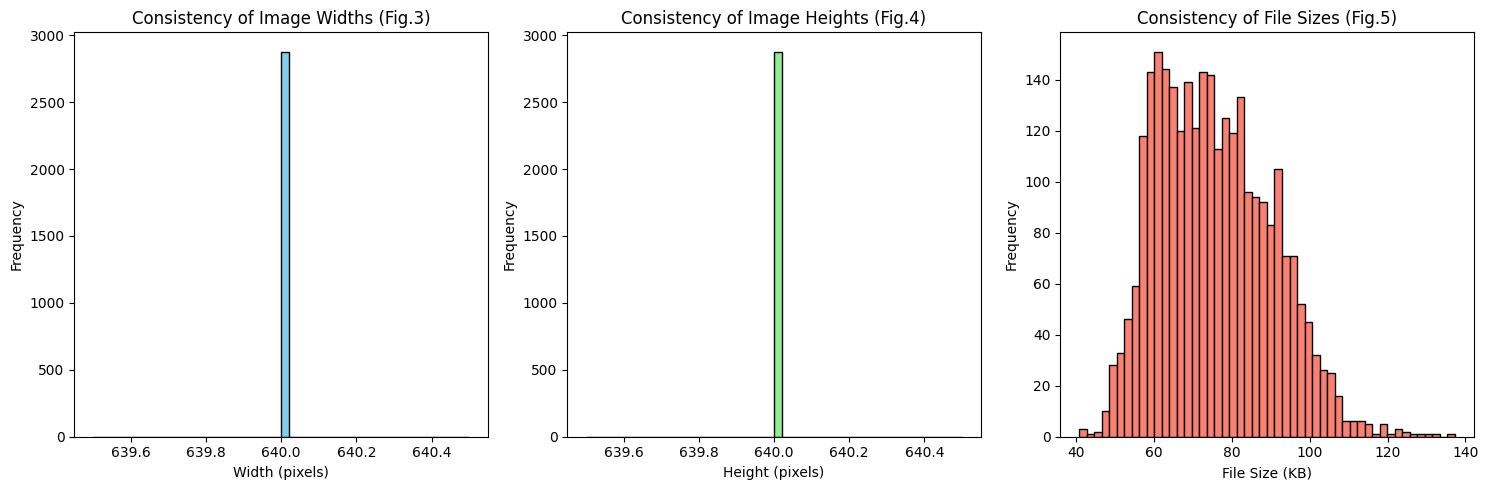

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to the train, valid, and test image folders
train_images_path = 'train/images'
valid_images_path = 'valid/images'
test_images_path = 'test/images'

# List of all image folders
image_folders = [train_images_path, valid_images_path, test_images_path]

# Initialize lists to store image attributes
resolutions = []
file_sizes = []
aspect_ratios = []

# Iterate through each image folder and collect attributes
for folder_path in image_folders:
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(folder_path, filename)

            # Get file size
            file_size_kb = os.path.getsize(filepath) / 1024  # in KB
            file_sizes.append(file_size_kb)

            try:
                # Open image to get resolution and calculate aspect ratio
                with Image.open(filepath) as img:
                    width, height = img.size
                    resolutions.append((width, height))
                    aspect_ratios.append(width / height)
            except Exception as e:
                print(f"Could not process image {filepath}: {e}")


# Prepare data for histograms
widths = [res[0] for res in resolutions]
heights = [res[1] for res in resolutions]

# Create histograms
plt.figure(figsize=(15, 5))

# Histogram of Image Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Widths (Fig.3)')

# Histogram of Image Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.title('Consistency of Image Heights (Fig.4)')

# Histogram of File Sizes
plt.subplot(1, 3, 3)
plt.hist(file_sizes, bins=50, color='salmon', edgecolor='black')
plt.xlabel('File Size (KB)')
plt.ylabel('Frequency')
plt.title('Consistency of File Sizes (Fig.5)')

plt.tight_layout()
plt.show()


# Section 3: Requirements

## Python Libraries Used

In [ ]:
!pip install ultralytics
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu121


# Section 4: Model Training

[Describe the model architecture and training pipeline.]

## Section 4.1: Training Hyperparameters

[Show training hyperparameters (learning rate, batch size, epochs).]

## Section 4.2: Performance Metrics

[Report performance metrics (mAP, IoU, precision, recall)]

## Section 4.3: Model Checkpoints

[Save and document model checkpoints]

# Section 5: Model Testing (Unseen Data)

[Explain your train/val/test split strategy. ]

## Section 5.1: Performance Metrics on Test set

[Report final metrics on this held-out test set (e.g., mAP@.5:.95, IoU,
precision/recall per class),]

## Section 5.2: Example of Dectections and Segmentations

[ present visual examples of detections/segmentations. Discuss
generalization, failure cases, and how results differ from validation.]

# Section 6: Web Deployment

[About the deployment]

## 6.1: Streamlit Guide

In [ ]:
# insert

### 6.1.1: User Uploded Image and Run Interface

In [ ]:
# insert

### 6.1.2: Display Detection and Segmentation Results

In [ ]:
# insert

# Section 7: Results and Analysis

[Overall Performance]

## Section 7.1: Quantative Results and Analysis

[metrics - Discuss strengths, weaknesses, and edge cases.]

In [ ]:
#insert

## Section 7.2: Qualitative Results and Analysis

[visual examples - Discuss strengths, weaknesses, and edge cases.]

In [ ]:
#insert

# Section 8 Documentation

[IEEE Paper]

## Section 8.1: Abstract

## Section 8.2: Introduction

## Section 8.3: Methodology
[dataset, model, training, deployment]

## Section 8.4: Results and Discussion

## Section 8.5: Conclusion and Future Work

## Section 8.6: References
[IEEE style]

# Section 9: Insights and conclusion

[Summarize what your group learned about building an computer vision system. Discuss the
strengths and limitations and suggest areas for future improvement.]

# Section 10: References

[Cite relevant references that you used in your project. All references must be cited, including:]

## Section 10.1: Scholarly Articles
[Cite in APA format, and put a description of how you used it for your work.]

## Section 10.2: Online References
[Put the website, blog, or article title, link, and how you incorporated it into your
work]

## Section 10.3: Artifical Intelligence Tools
[Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your
conversations with the model (including your prompts and its responses), and a
description of how you used it for your work.]